<a href="https://colab.research.google.com/github/juhipant09/iitg-hackathon/blob/main/work1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel("juhipant readings.xlsx")


In [6]:
df.head()

,Time,qufp,subfine,fine,coarse,PM10,PM2.5,PM1,"CO2, ppm","Temperature , °C","RH , %"
0,08:00:00,1497740,99219,2275,172,108.5,102.7,97.0,125.6,16.92,77.758789
1,08:01:00,1502201,100073,2182,130,107.3,102.0,97.0,124.8,16.92,77.758789
2,08:02:00,1508237,99281,2231,147,107.6,102.8,97.4,127.2,16.94,77.783203
3,08:03:00,1482070,97477,2304,154,105.9,101.1,95.8,124.8,16.94,77.685547
4,08:04:00,1490502,97373,2110,131,107.0,100.7,96.1,129.6,16.92,77.832031


In [7]:
df.shape

(721, 11)

In [20]:

df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              721 non-null    object 
 1   qufp              721 non-null    int64  
 2   subfine           721 non-null    int64  
 3   fine              721 non-null    int64  
 4   coarse            721 non-null    int64  
 5   PM10              721 non-null    float64
 6   PM2.5             721 non-null    float64
 7   PM1               721 non-null    float64
 8   CO2, ppm          721 non-null    float64
 9   Temperature , °C  721 non-null    float64
 10  RH , %            721 non-null    float64
dtypes: float64(6), int64(4), object(1)
memory usage: 62.1+ KB


,0
Time,0
qufp,0
subfine,0
fine,0
coarse,0
PM10,0
PM2.5,0
PM1,0
"CO2, ppm",0
"Temperature , °C",0


In [21]:
import pandas as pd
from scipy.stats import shapiro

# 1. Clean the column names in your DataFrame (removes leading/trailing spaces)
df.columns = df.columns.str.strip()

numeric_cols = [
    'qufp', 'subfine', 'fine', 'coarse', 'PM10', 'PM2.5', 'PM1',
    'CO2, ppm', 'Temperature , °C', 'RH , %'
]

results = []

for col in numeric_cols:
    # 2. Check if the column exists before trying to access it
    if col in df.columns:
        data = df[col].dropna()

        # 3. Shapiro-Wilk needs at least 3 samples to run
        if len(data) >= 3:
            stat, p = shapiro(data)
            results.append([col, stat, p])
        else:
            results.append([col, "Insufficient Data", None])
    else:
        # If the column is missing, we log it instead of crashing
        results.append([col, "Missing Column", None])

shapiro_df = pd.DataFrame(results, columns=["Parameter", "Shapiro Statistic", "p-value"])
shapiro_df

,Parameter,Shapiro Statistic,p-value
0,qufp,0.870322,5.533172e-24
1,subfine,0.954535,3.968973e-14
2,fine,0.952737,1.923384e-14
3,coarse,0.862383,1.258591e-24
4,PM10,0.749337,1.266589e-31
5,PM2.5,0.884775,9.884269e-23
6,PM1,0.894302,7.701843e-22
7,"CO2, ppm",0.912302,5.625616e-20
8,"Temperature , °C",0.805576,1.514421e-28
9,"RH , %",0.928939,5.532736e-18


In [22]:
results = []

for col in numeric_cols:
    stat, p = shapiro(df[col].dropna())

    if p > 0.05:
        result = "Normal"
    else:
        result = "Not Normal"

    results.append([col, stat, p, result])

shapiro_df = pd.DataFrame(
    results,
    columns=["Parameter","Statistic","p-value","Normality"]
)

shapiro_df

,Parameter,Statistic,p-value,Normality
0,qufp,0.870322,5.533172e-24,Not Normal
1,subfine,0.954535,3.968973e-14,Not Normal
2,fine,0.952737,1.923384e-14,Not Normal
3,coarse,0.862383,1.258591e-24,Not Normal
4,PM10,0.749337,1.266589e-31,Not Normal
5,PM2.5,0.884775,9.884269e-23,Not Normal
6,PM1,0.894302,7.701843e-22,Not Normal
7,"CO2, ppm",0.912302,5.625616e-20,Not Normal
8,"Temperature , °C",0.805576,1.514421e-28,Not Normal
9,"RH , %",0.928939,5.532736e-18,Not Normal


In [23]:

def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return column[(column < lower) | (column > upper)]

In [24]:

outliers_pm25 = detect_outliers_iqr(df['fine'])
print(outliers_pm25)

3      2304
6      2454
7      2365
14     2411
16     2365
17     2291
18     2352
19     2355
20     2341
31     2357
32     2336
34     2414
37     2329
42     2405
43     2300
47     2471
51     2307
52     2299
70     2298
78     2314
84     2314
265    2313
Name: fine, dtype: int64


In [28]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

In [29]:
def time_group(hour):
    if hour < 12:
        return "Morning"
    elif hour < 18:
        return "Afternoon"
    else:
        return "Evening"

df['Time_Group'] = df['Time'].dt.hour.apply(time_group)


In [30]:
from scipy.stats import kruskal

In [31]:

morning = df[df['Time_Group']=="Morning"]['PM2.5']
afternoon = df[df['Time_Group']=="Afternoon"]['PM2.5']
evening = df[df['Time_Group']=="Evening"]['PM2.5']

stat, p = kruskal(morning, afternoon, evening)

print("Statistic:", stat)
print("p-value:", p)


Statistic: 542.8290643637763
p-value: 1.337107623859393e-118


In [32]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

In [33]:
results = []

for col in numeric_cols:
    morning = df[df['Time_Group']=="Morning"][col]
    afternoon = df[df['Time_Group']=="Afternoon"][col]
    evening = df[df['Time_Group']=="Evening"][col]

    H, p = kruskal(morning, afternoon, evening)

    results.append([col, H, p])

results_df = pd.DataFrame(results, columns=["Parameter","H Statistic","p-value"])
results_df

,Parameter,H Statistic,p-value
0,qufp,573.806276,2.509287e-125
1,subfine,152.783878,6.658898e-34
2,fine,281.038665,9.402197e-62
3,coarse,295.841167,5.739932e-65
4,PM10,225.158457,1.280744e-49
5,PM2.5,542.829064,1.337108e-118
6,PM1,562.163222,8.468518e-123
7,"CO2, ppm",326.373835,1.345310e-71
8,"Temperature , °C",498.175071,6.647492e-109
9,"RH , %",400.901700,8.816618e-88


In [34]:
# Now the graph part starts

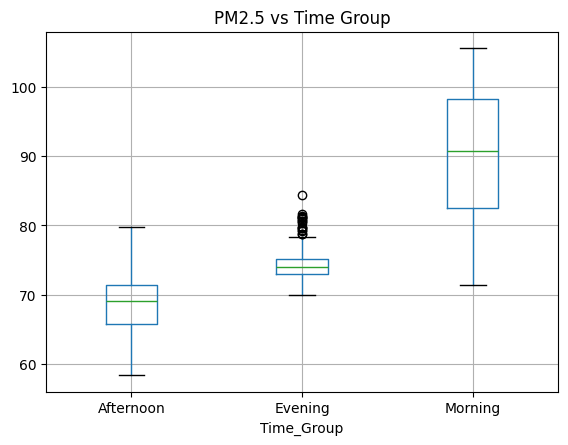

In [35]:
import matplotlib.pyplot as plt

df.boxplot(column='PM2.5', by='Time_Group')
plt.title("PM2.5 vs Time Group")
plt.suptitle("")
plt.show()

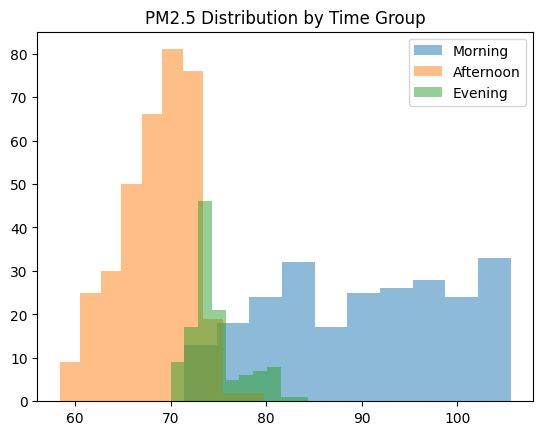

In [36]:
for grp in df['Time_Group'].unique():
    subset = df[df['Time_Group']==grp]
    plt.hist(subset['PM2.5'], alpha=0.5, label=grp)

plt.legend()
plt.title("PM2.5 Distribution by Time Group")
plt.show()

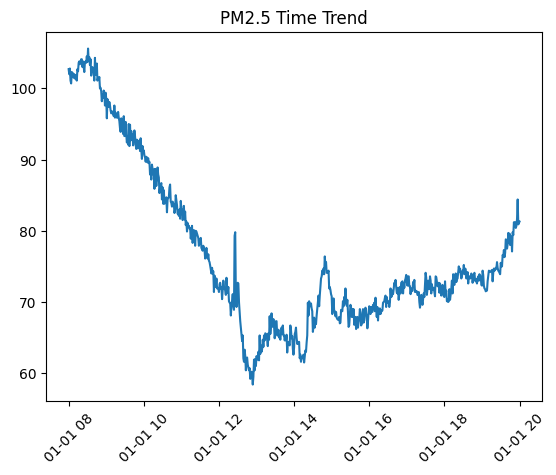

In [37]:
plt.plot(df['Time'], df['PM2.5'])
plt.xticks(rotation=45)
plt.title("PM2.5 Time Trend")
plt.show()